In [ ]:
NAME = "Group 18"
COLLABORATORS = ""


PART 1: REPORT

The report should be of a quality that is suitable for a management briefing. The report should be no more than 15 pages single-spaced in length. If you would like to include any code and samples of data, in addition to the Jupyter notebook, these should be included as an appendix, not in the main body of the report. Data samples should be limited to less than a page.

If you are performing a data analysis, your report should follow this outline:

Objectives:
What are the goals of the analysis and why did you choose them? What question(s) do you want to answer? What hypothesis(es) do you have and what is your approach to tackle the problem?

Data Preparation:
What was your data source (e.g., web scraping, corporate data, a standard machine learning data set, open data, etc.)? How good was the data quality? What did you need to do to procure it? What tools or code did you need to use to prepare it for analysis? What challenges did you face?

Analysis:
What trends, correlations, and/or patterns do you see in the data?

Conclusions:
What did you learn about your data set?s follows for a total out of 30:

If you refer to any external sources in your report (articles, blog posts, the Statistics Canada website, etc.), you must include the references for your sources. Use an established citation style, such as APA, Chicago, MLA, IEEE. This includes a URL for the webpage where your dataset came from, if from the Internet.

----------------------------------------------------------------------------------------
Grading scheme:

Suitability as a report and presentation to management – (10 marks)
-Spelling
-Explanation of any technical terms used
-Formatting
-Easy to follow
-Follows structure as described above

Correctness and thoroughness of analysis – (15 marks)
-Use of appropriate techniques
-Checking that the data meets any assumptions the model or test requires
-Correct interpretation

Novelty – (5 marks)
-Is this an interesting and different analysis?



## **Data Preparations**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import ks_2samp
import matplotlib as plt
import matplotlib.pyplot as plt
import os
import re

for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        if (filename == "googleplaystore.csv"):
          print(os.path.join(dirname, filename))


In [ ]:
try:
  df = pd.read_csv("googleplaystore.csv")  #open file to read data
except:
  from google.colab import drive
  drive.mount('/content/gdrive')
  df = pd.read_csv("./gdrive/.shortcut-targets-by-id/1QBs7Ri1sYKdy2R1Fycb48fibcTLY8HWB/Foundations of Data Science - Group 18/googleplaystore.csv")   #Code for Tyler to access the csv
df.set_index('App')                        #set index using PassengerId as unique primary key
df.head()                                  #display data layout with examples on top rows

Mounted at /content/gdrive


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# display data type (Dtype) of all attributes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Based on the types of objects; we see that we will have to convert into numerical for further analysis

In [ ]:
#App, Category, Content Rating, Type, Genres ==> convert to strings
#Current Version and Android Version ==> convert to strings, might be grouped in analysis stage
df["App"] = df["App"].astype("string")
df["Category"] = df["Category"].astype("string")
df["Content Rating"] = df["Content Rating"].astype("string")
df["Type"] = df["Type"].astype("string")
df["Genres"] = df["Genres"].astype("string")
df["Current Ver"] = df["Current Ver"].astype("string")
df["Android Ver"] = df["Android Ver"].astype("string")

#For now, other objects can be strings and we will convert to the correct values later
df["Reviews"] = df["Reviews"].astype("string")
df["Size"] = df["Size"].astype("string")
df["Installs"] = df["Installs"].astype("string")
df["Price"] = df["Price"].astype("string")
df["Last Updated"] = df["Last Updated"].astype("string")

df.dtypes

App                string
Category           string
Rating            float64
Reviews            string
Size               string
Installs           string
Type               string
Price              string
Content Rating     string
Genres             string
Last Updated       string
Current Ver        string
Android Ver        string
dtype: object

In [ ]:
# Before doing missing columns - we have to clean up some variables

In [ ]:
# Cleaning missing values for attributes that are included in the analysis
#
# Data cleaning prior to analysis, to discover NaN that may affect calculation in assumption:
#     Rating: calculate in 2 ways to handle the NaN. Overall Mean, Category Mean
#     Type: low occurance
#     Content Rating: low occurance ==> Remove from Dataset
#     Current Ver: low occurance ==> Remove from Dataset
#     Android Ver: low occurance ==> Remove from Dataset

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# Missing values for those attributes that included in the analysis

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
Rating,1474,13.6
Current Ver,8,0.1
Android Ver,3,0.0
Type,1,0.0
Content Rating,1,0.0
App,0,0.0
Category,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0


In [ ]:
#Check list of data still to be cleaned...
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#For type; we could identify that if the price is zero then the Type is "Free"
#What we could do ... df["Type"] = df.apply(lambda c: c["Type"] if not pd.isnull(c["Type"]) else "Free" if c["Price"] == "0" else "Paid", axis = 1)
df.loc[9148,:]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   <NA>
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [ ]:
#However ==> After further review; this row appears to be a special case, which also has no Size, no reviews and no installs ==> so we decided to just remove it

In [ ]:
#Where a single data point is missing (Content Rating) we elected to remove the item from our analysis.
#We note that these are important columns to our analysis and it would be inappropriate to use these records with incomplete data
#Additionally, the data has more than 10,000 rows so this is less than 0.01% of the data set
df = df.dropna(axis=0, subset = ["Type","Content Rating"])
df.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
#Installs - they appear to always have a + sign attached to the number, check if this is true
print(df.apply(lambda x:x["Installs"][-1:],axis=1).value_counts())

#We should rename the column to be "Installs+" and remove the + from each row so its a number
df = df.rename(columns={"Installs":"Installs+"})
df["Installs+"] = df.apply(lambda x:float(x["Installs+"][:-1].replace(",","")),axis=1)

+    10839
dtype: int64


In [ ]:
#For android version; we are still missing a very small subest of the data but we can look at the data first to see if there is an overwhelming mode in the data set
#This is reasonable because our hypothesis (for this column) is that most users have the most up to date version
df["Current Ver"].value_counts()

Varies with device    1458
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.4.5.2                  1
1.7.0.00115              1
2.6.28                   1
14.01                    1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: Int64

In [ ]:
df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: Int64

In [ ]:
#Based on the findings above - there are a lot of data points; and not an overwhelming mode
#However, based on the question we are asking (not intending to use version); it is not necessary to drop these rows.
#Therefore we have elected to use the mode to fill in these rows ==> these rows are a small proportion of the data set and filling with the mode will not impact results
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs+            0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [ ]:
df["Android Ver"].value_counts()

4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: Int64

In [ ]:
df["Current Ver"].value_counts()

Varies with device    1466
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.4.5.2                  1
1.7.0.00115              1
2.6.28                   1
14.01                    1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: Int64

In [ ]:
#Now that we have removed the NA from the data set our last step is to ensure the right type for each column
df.dtypes

App                string
Category           string
Rating            float64
Reviews            string
Size               string
Installs+         float64
Type               string
Price              string
Content Rating     string
Genres             string
Last Updated       string
Current Ver        string
Android Ver        string
dtype: object

In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Size - it appears this is in M, but maybe some are G?
#First we convert to text and look at the last letter
print(df.apply(lambda x:x["Size"][-1:],axis=1).value_counts())

print(df["Size"].value_counts())

#We see that we have some "Varies with device" ==> which in many ways is the same as null (because we can't really use that!)
#otherwise we see sizes in M (millions) and k (thousands)
#So we should convert all items in a numerical value and then figure out what to do with the null values later...
df["Size"] = df.apply(lambda a: None if a["Size"] == "Varies with device" else 1000*float(a["Size"][:-1]) if a["Size"][-1:]=="k" else 1000000*float(a["Size"][:-1]), axis = 1)

M    8829
e    1694
k     316
dtype: int64
Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
39k                      1
879k                     1
161k                     1
994k                     1
619k                     1
Name: Size, Length: 461, dtype: Int64


In [ ]:
#Reviews and price should be numbers
df["Reviews"] = df["Reviews"].astype("float")
df.dtypes

App                string
Category           string
Rating            float64
Reviews           float64
Size              float64
Installs+         float64
Type               string
Price              string
Content Rating     string
Genres             string
Last Updated       string
Current Ver        string
Android Ver        string
dtype: object

In [ ]:
#Price
df["Price"].value_counts()
df["Price"] = df.apply(lambda x:float(0 if x["Price"] == "0" else x["Price"][1:].replace(",","")),axis=1)

In [ ]:
#Last Updated
#This is a date ==> ...
df["Last Updated"] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y')
df.dtypes

App                       string
Category                  string
Rating                   float64
Reviews                  float64
Size                     float64
Installs+                float64
Type                      string
Price                    float64
Content Rating            string
Genres                    string
Last Updated      datetime64[ns]
Current Ver               string
Android Ver               string
dtype: object

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500000.0,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
#NaN values in Size
df.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size              1694
Installs+            0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Category: 0.4792986250018586
Content Rating: 0.4475769617547384
Genres: 0.3427861566519549
             Rating   Reviews      Size  Installs+     Price
Rating     1.000000  0.068141  0.083734   0.051355 -0.021903
Reviews    0.068141  1.000000  0.238215   0.643121 -0.009668
Size       0.083734  0.238215  1.000000   0.164787 -0.023006
Installs+  0.051355  0.643121  0.164787   1.000000 -0.011691
Price     -0.021903 -0.009668 -0.023006  -0.011691  1.000000


<ipython-input-28-f18d9b9634d9>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


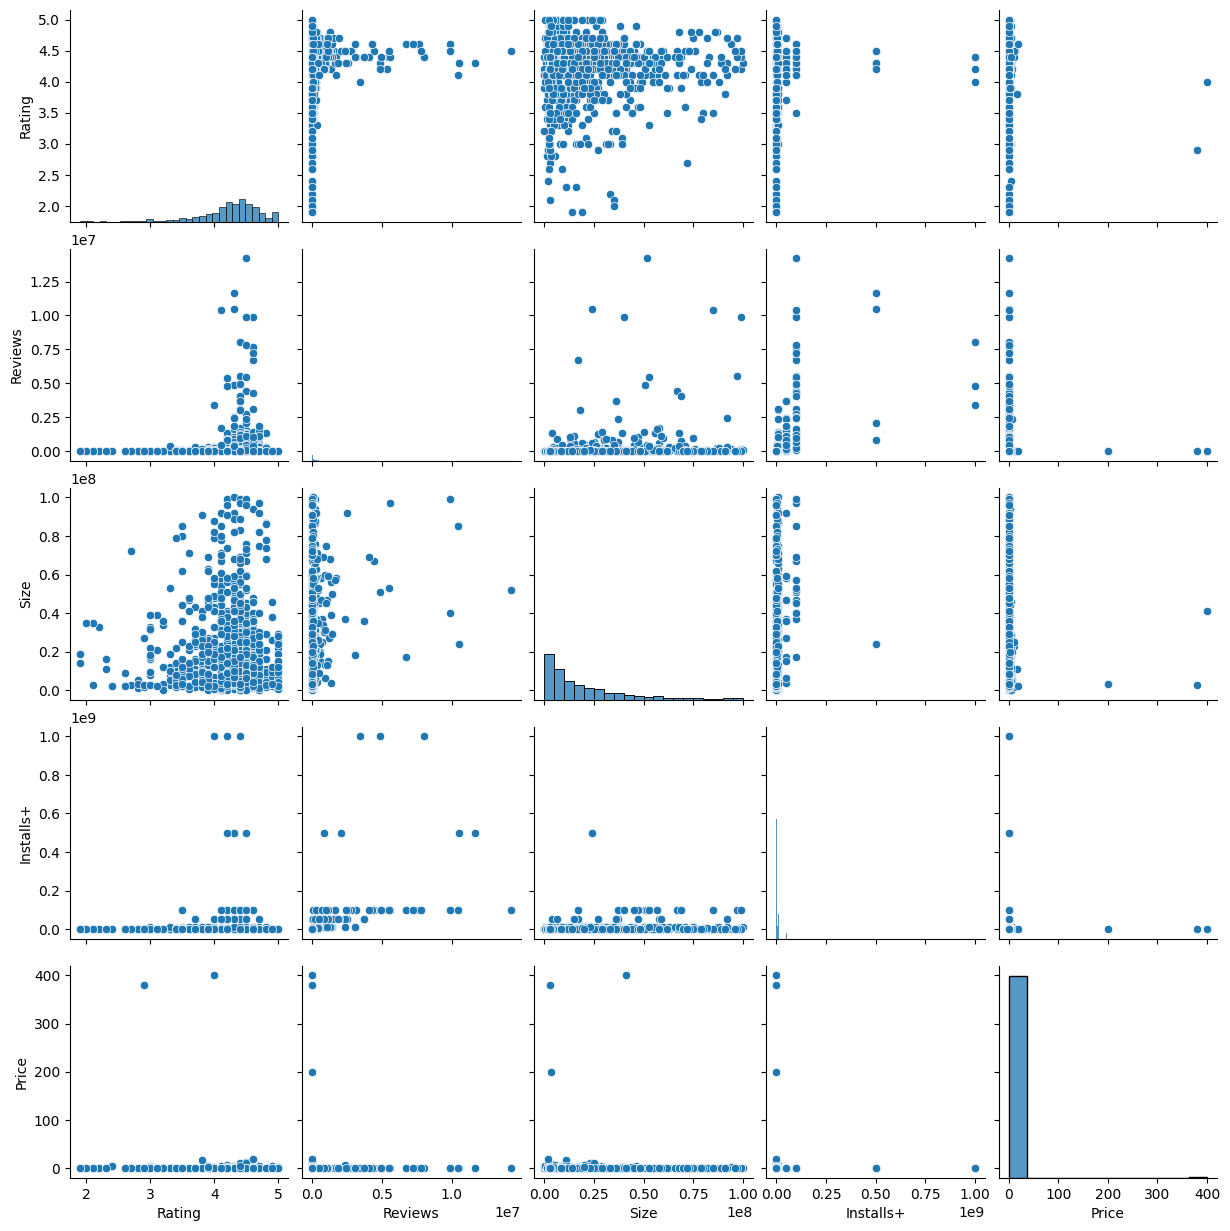

In [ ]:
#RATING
#To determine which has the lowest standard deviation (i.e. which has the least variation )
print("Category: " + str(df.groupby("Category")["Rating"].std().mean()))
print("Content Rating: " + str(df.groupby("Content Rating")["Rating"].std().mean()))
print("Genres: " + str(df.groupby("Genres")["Rating"].std().mean()))

#We can also look at numeric variables to see if there is a correlation
print(df.corr())
import seaborn as sns
g = sns.pairplot(df.sample(1000))


In [ ]:
#Based on this, the lowest standard deviation, and our selected column for grouping is Genres
#We also don't see strong correlations with any numeric variables

#See Appendix for discussion of Mean vs Media for This Analaysis
df["RatingFilled"] = df["Rating"].fillna(df.groupby("Genres")["Rating"].transform("median"))

#We were still left with some null values so then we went to the Content Rating
df["RatingFilled"] = df["RatingFilled"].fillna(df.groupby("Content Rating")["Rating"].transform("median"))
#df["Rating"].fillna(myOverallMeanRating)

In [ ]:
#SIZE
#To determine which has lowest standard deviation (i.e. which has the least variation )
print("Category: " + str(df.groupby("Category")["Size"].std().mean()))
print("Content Rating: " + str(df.groupby("Content Rating")["Size"].std().mean()))
print("Genres: " + str(df.groupby("Genres")["Size"].std().mean()))

#We can also assess if there is a correlation...which is closes to Reviews
df.corr()

#We can also look at numeric variables to see if there is a correlation (same as above)
print(df.corr())
#g = sns.pairplot(df.sample(10)) ==> No need to reprint as it is above

Category: 16806122.73222787
Content Rating: 21265021.549367968
Genres: 18893092.42987031
                        Rating   Reviews      Size  Installs+     Price  \
Rating                1.000000  0.068141  0.083734   0.051355 -0.021903   
Reviews               0.068141  1.000000  0.238215   0.643121 -0.009668   
Size                  0.083734  0.238215  1.000000   0.164787 -0.023006   
Installs+             0.051355  0.643121  0.164787   1.000000 -0.011691   
Price                -0.021903 -0.009668 -0.023006  -0.011691  1.000000   
RatingFilled          1.000000  0.063149  0.066522   0.045551 -0.019210   
Category_Group        0.022550  0.140426  0.093334   0.170247 -0.048935   
Content_Rating_Group  0.047441  0.094653  0.176333   0.064355 -0.007623   

                      RatingFilled  Category_Group  Content_Rating_Group  
Rating                    1.000000        0.022550              0.047441  
Reviews                   0.063149        0.140426              0.094653  
Size      

<ipython-input-52-006228d63389>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-52-006228d63389>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [ ]:
#For the NaN values in size, we have elected to keep these rows as NaN
#There are a large % of rows with NaN and replacing with a zero or a mean or other metric may be misleading
#While we see some correlation with Reviews as per the correlation table, but it is not clear in the chart and it is not strong enough to warrant replacement
#Removing the rows would significantly reduce the size of the data set and potentially remove important rows
#When doing analysis we will be aware of these rows and adjust our analysis accordingly

In [ ]:
#This marks the end of the data cleanup.  The next stage is the analysis.
df.head(5)


,App,Category,Rating,Reviews,Size,Installs+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,RatingFilled
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.3


In [ ]:
df.to_csv("./cleaned_googleplaystore.csv") #, sep=',', index=False, encoding='utf-8')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10839 non-null  string        
 1   Category        10839 non-null  string        
 2   Rating          9366 non-null   float64       
 3   Reviews         10839 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs+       10839 non-null  float64       
 6   Type            10839 non-null  string        
 7   Price           10839 non-null  float64       
 8   Content Rating  10839 non-null  string        
 9   Genres          10839 non-null  string        
 10  Last Updated    10839 non-null  datetime64[ns]
 11  Current Ver     10839 non-null  string        
 12  Android Ver     10839 non-null  string        
 13  RatingFilled    10839 non-null  float64       
dtypes: datetime64[ns](1), float64(6), string(7)
memory usa

## **Analysis - Feature Enineering and Correlation Maps**

In [ ]:
# Find out the mean installation number for each age group
content_rating_avg_installs = df.groupby("Content Rating")["Installs+"].mean()
# Sort the Series by 'Installs+'
content_rating_avg_installs = content_rating_avg_installs.sort_values()
content_rating_avg_installs

Content Rating
Unrated            2.525000e+04
Adults only 18+    6.666667e+05
Mature 17+         1.107112e+07
Everyone           1.310037e+07
Teen               2.873870e+07
Everyone 10+       3.204330e+07
Name: Installs+, dtype: float64

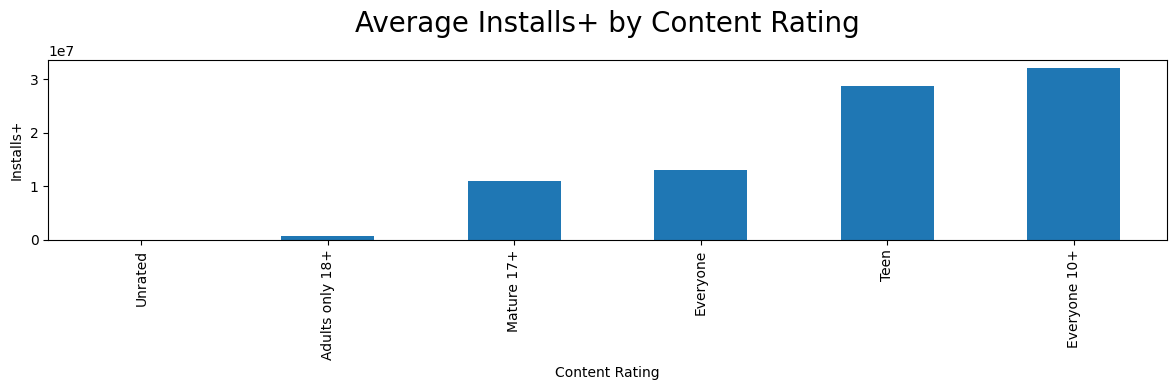

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 4))
content_rating_avg_installs.plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Installs+')
plt.title('Average Installs+ by Content Rating', fontsize=20, pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()

try:
    plt.savefig("./gdrive/.shortcut-targets-by-id/1QBs7Ri1sYKdy2R1Fycb48fibcTLY8HWB/Foundations of Data Science - Group 18/average_installs+_vs_content_rating.png")
except:
    plt.savefig("average_installs+_vs_content_rating.png")

plt.show()

In [ ]:
# Find out the mean installation number for each category
category_avg_installs = df.groupby("Category")["Installs+"].mean()
# Sort the Series by 'Installs+'
category_avg_installs = category_avg_installs.sort_values()
category_avg_installs

Category
MEDICAL                1.150269e+05
EVENTS                 2.495806e+05
BEAUTY                 5.131519e+05
PARENTING              5.253518e+05
AUTO_AND_VEHICLES      6.250613e+05
LIBRARIES_AND_DEMO     7.411284e+05
COMICS                 9.347692e+05
DATING                 1.129533e+06
LIFESTYLE              1.407444e+06
ART_AND_DESIGN         1.912894e+06
HOUSE_AND_HOME         1.917187e+06
FOOD_AND_DRINK         2.156683e+06
BUSINESS               2.178076e+06
FINANCE                2.395215e+06
SPORTS                 4.560350e+06
HEALTH_AND_FITNESS     4.642441e+06
WEATHER                5.196348e+06
FAMILY                 5.204598e+06
MAPS_AND_NAVIGATION    5.286729e+06
EDUCATION              5.586231e+06
PERSONALIZATION        5.932385e+06
BOOKS_AND_REFERENCE    8.318050e+06
SHOPPING               1.249173e+07
TOOLS                  1.358573e+07
ENTERTAINMENT          1.925611e+07
NEWS_AND_MAGAZINES     2.648876e+07
TRAVEL_AND_LOCAL       2.662359e+07
PHOTOGRAPHY        

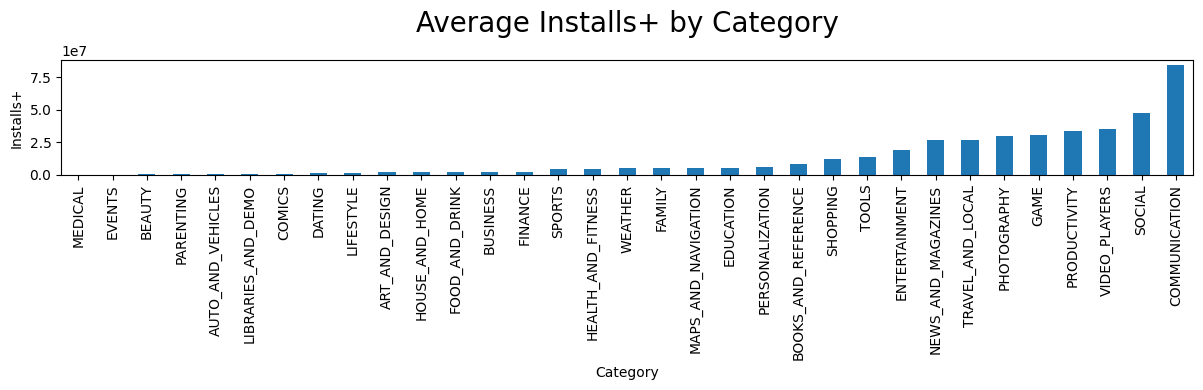

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 4))
category_avg_installs.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Installs+')
plt.title('Average Installs+ by Category', fontsize=20, pad=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()

try:
    plt.savefig("./gdrive/.shortcut-targets-by-id/1QBs7Ri1sYKdy2R1Fycb48fibcTLY8HWB/Foundations of Data Science - Group 18/average_installs+_vs_category_bar_chart.png")
except:
    plt.savefig("average_installs+_vs_category_bar_chart.png")

plt.show()

In [ ]:
# Category was re-engineered to follow the order of installation numbers
# New Column = Category_Group

def Category(row):
    if row["Category"] == "MEDICAL":
        return 1
    elif row["Category"] == "EVENTS":
        return 2
    elif row["Category"] == "BEAUTY":
        return 3
    elif row["Category"] == "PARENTING":
        return 4
    elif row["Category"] == "AUTO_AND_VEHICLES":
        return 5
    elif row["Category"] == "LIBRARIES_AND_DEMO":
        return 6
    elif row["Category"] == "COMICS":
        return 7
    elif row["Category"] == "DATING":
        return 8
    elif row["Category"] == "LIFESTYLE":
        return 9
    elif row["Category"] == "ART_AND_DESIGN":
        return 10
    elif row["Category"] == "HOUSE_AND_HOME":
        return 11
    elif row["Category"] == "FOOD_AND_DRINK":
        return 12
    elif row["Category"] == "BUSINESS":
        return 13
    elif row["Category"] == "FINANCE":
        return 14
    elif row["Category"] == "SPORTS":
        return 15
    elif row["Category"] == "HEALTH_AND_FITNESS":
        return 16
    elif row["Category"] == "WEATHER":
        return 17
    elif row["Category"] == "FAMILY":
        return 18
    elif row["Category"] == "MAPS_AND_NAVIGATION":
        return 19
    elif row["Category"] == "EDUCATION":
        return 20
    elif row["Category"] == "PERSONALIZATION":
        return 21
    elif row["Category"] == "BOOKS_AND_REFERENCE":
        return 22
    elif row["Category"] == "SHOPPING":
        return 23
    elif row["Category"] == "TOOLS":
        return 24
    elif row["Category"] == "ENTERTAINMENT":
        return 25
    elif row["Category"] == "NEWS_AND_MAGAZINES":
        return 26
    elif row["Category"] == "TRAVEL_AND_LOCAL":
        return 27
    elif row["Category"] == "PHOTOGRAPHY":
        return 28
    elif row["Category"] == "GAME":
        return 29
    elif row["Category"] == "PRODUCTIVITY":
        return 30
    elif row["Category"] == "VIDEO_PLAYERS":
        return 31
    elif row["Category"] == "SOCIAL":
        return 32
    elif row["Category"] == "COMMUNICATION":
        return 33
    else:
        return 0

df = df.assign(Category_Group=df.apply(Category, axis=1))
df.head(10)

,App,Category,Rating,Reviews,Size,Installs+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,RatingFilled,Category_Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1,10
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9,10
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.7,10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.5,10
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.3,10
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600000.0,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,4.4,10
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19000000.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up,3.8,10
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29000000.0,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up,4.1,10
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33000000.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,4.4,10
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3100000.0,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up,4.7,10


In [ ]:
# Feature Re-enineering - Content_Rating to follow the order of installation numbers
# New Column added : Content_Rating_Group

# Content Rating was re-engineered as follow.
# Unrated = 0
# Adults only 18+ = 1
# Mature 17+ = 2
# Everyone = 3
# Teen = 4
# Everyone 10+ = 5
# Else i.e. NaN = 0

# New Column = Content_Rating_Group

def Content_Rating(row):
    if row["Content Rating"] == "Unrated":
        return 0
    elif row["Content Rating"] == "Adults only 18+":
        return 1
    elif row["Content Rating"] == "Mature 17+":
        return 2
    elif row["Content Rating"] == "Everyone":
        return 3
    elif row["Content Rating"] == "Teen":
        return 4
    elif row["Content Rating"] == "Everyone 10+":
        return 5
    else:
        return 0

df = df.assign(Content_Rating_Group=df.apply(Content_Rating, axis=1))
df.head(5)

,App,Category,Rating,Reviews,Size,Installs+,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,RatingFilled,Category_Group,Content_Rating_Group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,4.1,10,3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,3.9,10,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,4.7,10,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,4.5,10,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,4.3,10,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   10839 non-null  string        
 1   Category              10839 non-null  string        
 2   Rating                9366 non-null   float64       
 3   Reviews               10839 non-null  float64       
 4   Size                  9145 non-null   float64       
 5   Installs+             10839 non-null  float64       
 6   Type                  10839 non-null  string        
 7   Price                 10839 non-null  float64       
 8   Content Rating        10839 non-null  string        
 9   Genres                10839 non-null  string        
 10  Last Updated          10839 non-null  datetime64[ns]
 11  Current Ver           10839 non-null  string        
 12  Android Ver           10839 non-null  string        
 13  RatingFilled    

In [ ]:
# This subset is used specifically for correlation Analysis.
df1 = df[['Price', 'Content_Rating_Group','Reviews','Rating','RatingFilled','Category_Group','Size','Installs+']].copy()
df1.head(10)

,Price,Content_Rating_Group,Reviews,Rating,RatingFilled,Category_Group,Size,Installs+
0,0.0,3,159.0,4.1,4.1,10,19000000.0,10000.0
1,0.0,3,967.0,3.9,3.9,10,14000000.0,500000.0
2,0.0,3,87510.0,4.7,4.7,10,8700000.0,5000000.0
3,0.0,4,215644.0,4.5,4.5,10,25000000.0,50000000.0
4,0.0,3,967.0,4.3,4.3,10,2800000.0,100000.0
5,0.0,3,167.0,4.4,4.4,10,5600000.0,50000.0
6,0.0,3,178.0,3.8,3.8,10,19000000.0,50000.0
7,0.0,3,36815.0,4.1,4.1,10,29000000.0,1000000.0
8,0.0,3,13791.0,4.4,4.4,10,33000000.0,1000000.0
9,0.0,3,121.0,4.7,4.7,10,3100000.0,10000.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 10839 non-null  float64
 1   Content_Rating_Group  10839 non-null  int64  
 2   Reviews               10839 non-null  float64
 3   Rating                9366 non-null   float64
 4   RatingFilled          10839 non-null  float64
 5   Category_Group        10839 non-null  int64  
 6   Size                  9145 non-null   float64
 7   Installs+             10839 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 762.1 KB


In [ ]:
# Correlation Matrix
df1.corr()

,Price,Content_Rating_Group,Reviews,Rating,RatingFilled,Category_Group,Size,Installs+
Price,1.000000,-0.007623,-0.009668,-0.021903,-0.020335,-0.048935,-0.023006,-0.011691
Content_Rating_Group,-0.007623,1.000000,0.094653,0.047441,0.049942,0.151307,0.176333,0.064355
Reviews,-0.009668,0.094653,1.000000,0.068141,0.068280,0.140426,0.238215,0.643121
Rating,-0.021903,0.047441,0.068141,1.000000,1.000000,0.022550,0.083734,0.051355
RatingFilled,-0.020335,0.049942,0.068280,1.000000,1.000000,0.022563,0.079223,0.051632
Category_Group,-0.048935,0.151307,0.140426,0.022550,0.022563,1.000000,0.093334,0.170247
Size,-0.023006,0.176333,0.238215,0.083734,0.079223,0.093334,1.000000,0.164787
Installs+,-0.011691,0.064355,0.643121,0.051355,0.051632,0.170247,0.164787,1.000000


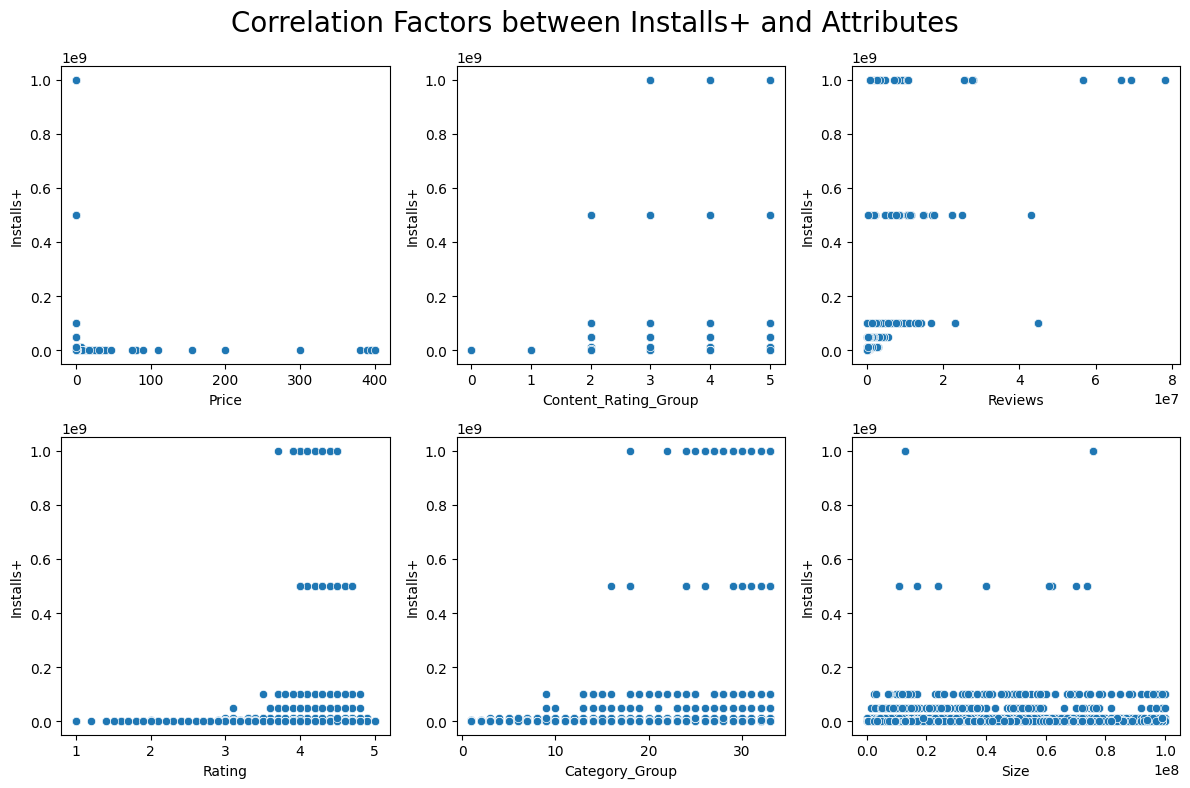

In [ ]:
# Variables for scatter plots
x = ['Price', 'Content_Rating_Group', 'Reviews', 'Rating', 'Category_Group', 'Size']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.suptitle('Correlation Factors between Installs+ and Attributes', fontsize=20)

# Plot each pair of variables
for i, x_data in enumerate(x):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=x_data, y='Installs+', data=df1, ax=axes[row, col])

plt.tight_layout()
try:
    plt.savefig("./gdrive/.shortcut-targets-by-id/1QBs7Ri1sYKdy2R1Fycb48fibcTLY8HWB/Foundations of Data Science - Group 18/correlation_factors_between_installs+_and_attributes.png")
except:
    plt.savefig("correlation_factors_between_installs+_and_attributes.png")
plt.show()


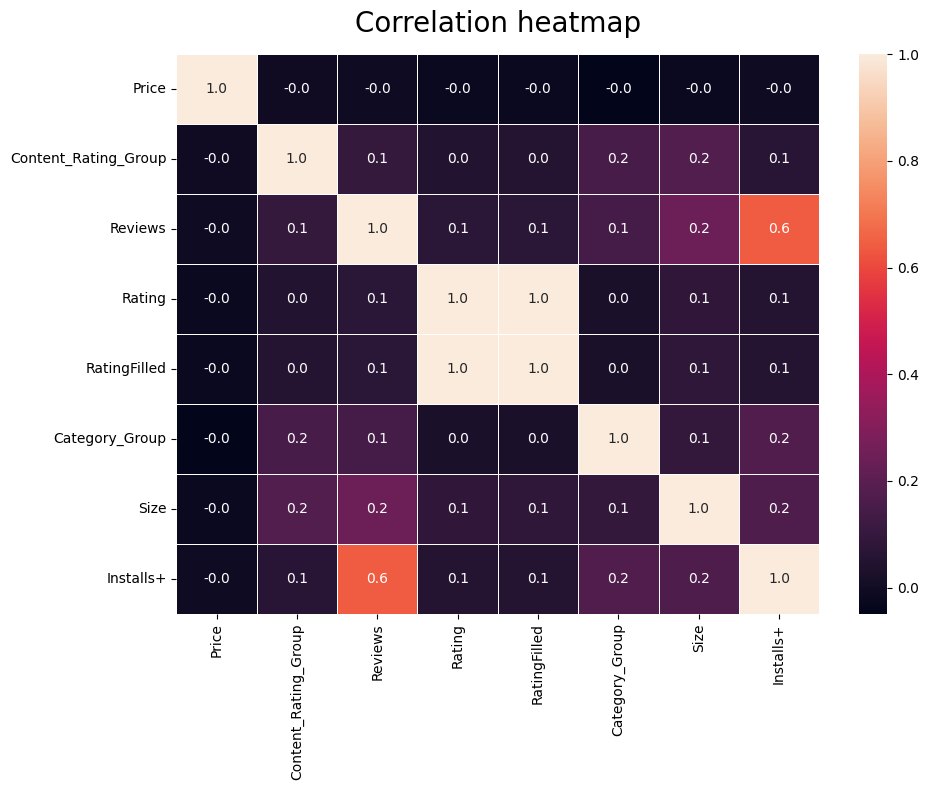

In [ ]:
# Correlation heat map

f,ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':20}, pad=16)
plt.tight_layout()
try:
    plt.savefig("./gdrive/.shortcut-targets-by-id/1QBs7Ri1sYKdy2R1Fycb48fibcTLY8HWB/Foundations of Data Science - Group 18/correlation_heatmap.png")
except:
    plt.savefig("correlation_heatmap.png")
plt.show()

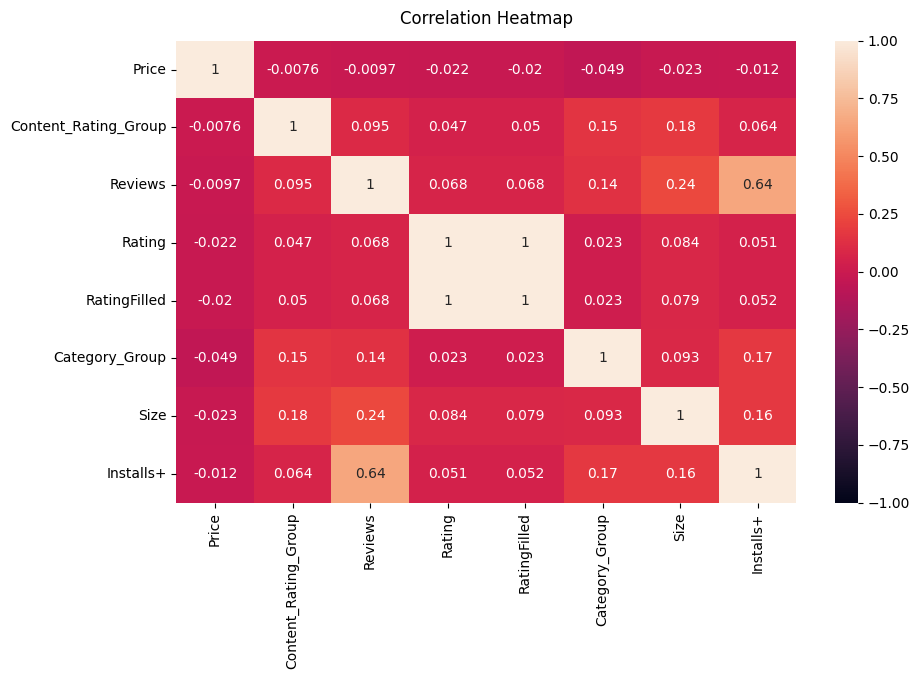

In [ ]:
# Correlation Heatmap
# An alternative graph to above.
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

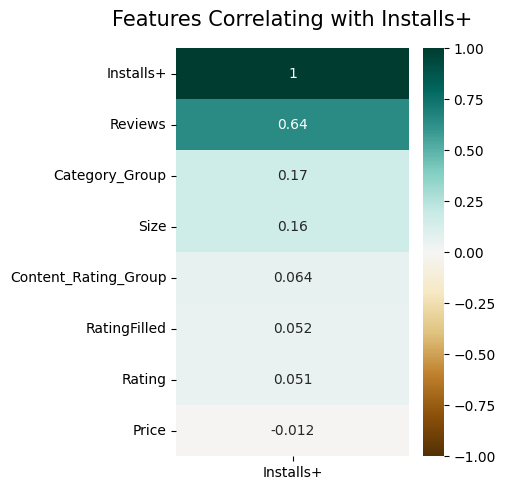

In [ ]:
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(df1.corr()[['Installs+']].sort_values(by='Installs+', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Installs+', fontdict={'fontsize':15}, pad=16)
plt.tight_layout()
try:
    plt.savefig("./gdrive/.shortcut-targets-by-id/1QBs7Ri1sYKdy2R1Fycb48fibcTLY8HWB/Foundations of Data Science - Group 18/features_correlating_with_installs+.png")
except:
    plt.savefig("features_correlating_with_installs+.png")
plt.show()